# Dictionaries and sets
- Hash tables are the engines behind Python’s high performance dicts.
- Knowing how a hash table works is key to making the most of dictionaries and sets.

# Generic mapping types
- All mapping types in the standard library use the basic dict in their implementation, so they share the limitation that the keys must be hashable (the values need not be hashable, only the keys).

_**Hashable**_
- The atomic immutable types (str, bytes, numeric types) are all hashable. A frozen set is always hashable, because its elements must be hashable by definition. A tuple is hashable only if all its items are hashable

# _dict_ comprehensions

# Overview of common mapping methods
- `dict`, `defaultdict`, `OrderedDict` are most commonly used
- You can use `d.pop` for dictionary remove and return value at k, or default or None if missing

## Handling missing keys with setdefault
- `my_dict.setdefault(key, [])`, when `key` doesn't exist in `my_dict`, then set it as 

In [4]:
d = {'a': 1, 'b': 2, 'c': 3}

In [5]:
d.pop('a')

1

In [6]:
d

{'b': 2, 'c': 3}

In [13]:
sentence = ['hi', 'yang', 'hi', 'yun', 'hi', 'xiao']
i_d = {}
for index, word in enumerate(sentence):
    i_d.setdefault(word, []).append(index)
print(i_d)

{'hi': [0, 2, 4], 'yang': [1], 'yun': [3], 'xiao': [5]}


^^ This is insanely convenient

In [19]:
c_d = {}
for word in sentence:
    c_d.setdefault(word, 0)
    c_d[word] += 1
print(c_d)

{'hi': 3, 'yang': 1, 'yun': 1, 'xiao': 1}


# Mappings with flexible key lookup
## _defaultdict_: another take on missing keys
- when instantiating a defaultdict, you provide a callable which is used to produce a default value whenever `__getitem__` is passed a non-existent key argument.

## The _\_missing\__ method
- If you subclass `dict` and provide a `__missing__` method, the standard `dict.__getitem__` will call it whenever a key is not found, instead of raising KeyError.
- A better way to create a user-defined mapping type is to subclass `collections.UserDict` instead of `dict`

In [20]:
from collections import defaultdict
dd = defaultdict(list)
for index, word in enumerate(sentence):
    dd[word].append(index)

In [21]:
dd

defaultdict(list, {'hi': [0, 2, 4], 'yang': [1], 'yun': [3], 'xiao': [5]})

In [23]:
dd_0 = defaultdict(int)
for index, word in enumerate(sentence):
    dd_0[word] += 1

In [24]:
dd_0

defaultdict(int, {'hi': 3, 'yang': 1, 'yun': 1, 'xiao': 1})

# Variations of _dict_
- `collections.OrderedDict`: maintains keys in insertion order, allowing iteration over items in a predictable order.
- `collections.Counter`: a mapping that holds an integer count for each key
- `collections.UserDict`: is designed to be subclassed, as we’ll do next.

# Subclassing _UserDict_
- It’s almost always easier to create a new mapping type by extending `UserDict` than `dict`.
- Note that `UserDict` does not inherit from `dict`, but has an internal `dict` instance, called data, which holds the actual items.

# Immutable mappings
- The mapping types provided by the standard library are all mutable, but you may need to guarantee that a user cannot change a mapping by mistake
- `MappingProxyType`: the types module provides a wrapper class which, given a mapping, returns a mappingproxy instance that is a read-only but dynamic view of the original mapping

In [25]:
from types import MappingProxyType
d = {'1': 'One', '2': 'Two'}
d_proxy = MappingProxyType(d)
d_proxy

mappingproxy({'1': 'One', '2': 'Two'})

In [26]:
d_proxy['1']

'One'

In [27]:
d_proxy['2'] = 'two'

TypeError: 'mappingproxy' object does not support item assignment

In [28]:
d['3'] = 'Three'
d_proxy

mappingproxy({'1': 'One', '2': 'Two', '3': 'Three'})

# Set theory
- A set is a collection of unique objects
- The `set` type is not hashable, but `frozenset` is, so you can have frozenset elements inside a set.

## Set comprehensions (setcomps)
-  After Python 2.7, set comprehensions were added

## Set Operations
- Union operation, the first element has to be a set
- Superset (s.issuperset(it), or s <= z) and subset operations (s.issubset(it), or s <= z)
- Remove element(s) from a set
    - `s.clear()`, remove all elements from s
    - `s.discard(e)`, remove element `e` from `s` if it is present
    - `s.pop()`, remove and return an element from `s`, raising `KeyError` if s is empty.
    - `s.remove(e)`, remove element e from s, raising KeyError if e not in s.

In [1]:
s = {1}
a = [1,2,3,4,1,1,1]
set(a)

{1, 2, 3, 4}

In [2]:
a = set(a)

In [3]:
s in a

False

In [6]:
1 in a

True

In [9]:
a - s

{2, 3, 4}

In [10]:
a | s

{1, 2, 3, 4}

In [11]:
a & s

{1}

In [14]:
b = frozenset(range(0, 10))
b

frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [18]:
a.union([245], [777,9])

{1, 2, 3, 4, 9, 245, 777}

In [22]:
set([1,2,4])

{1, 2, 4}

# `dict` and `set` under the hood
## Hash tables in dictionaries
- A hash table is a sparse array, i.e. an array which always has empty cells
- The cells in a hash table are often called “buckets”
- In a dict hash table, there is a bucket for each item, and it contains two fields: a reference to the key and a reference to the value of the item
- Because all buckets have the same size, access to an individual bucket is done by offset.
- To be effective as hash table indexes, ideally, objects that are similar but not equal should have hash values that differ widely
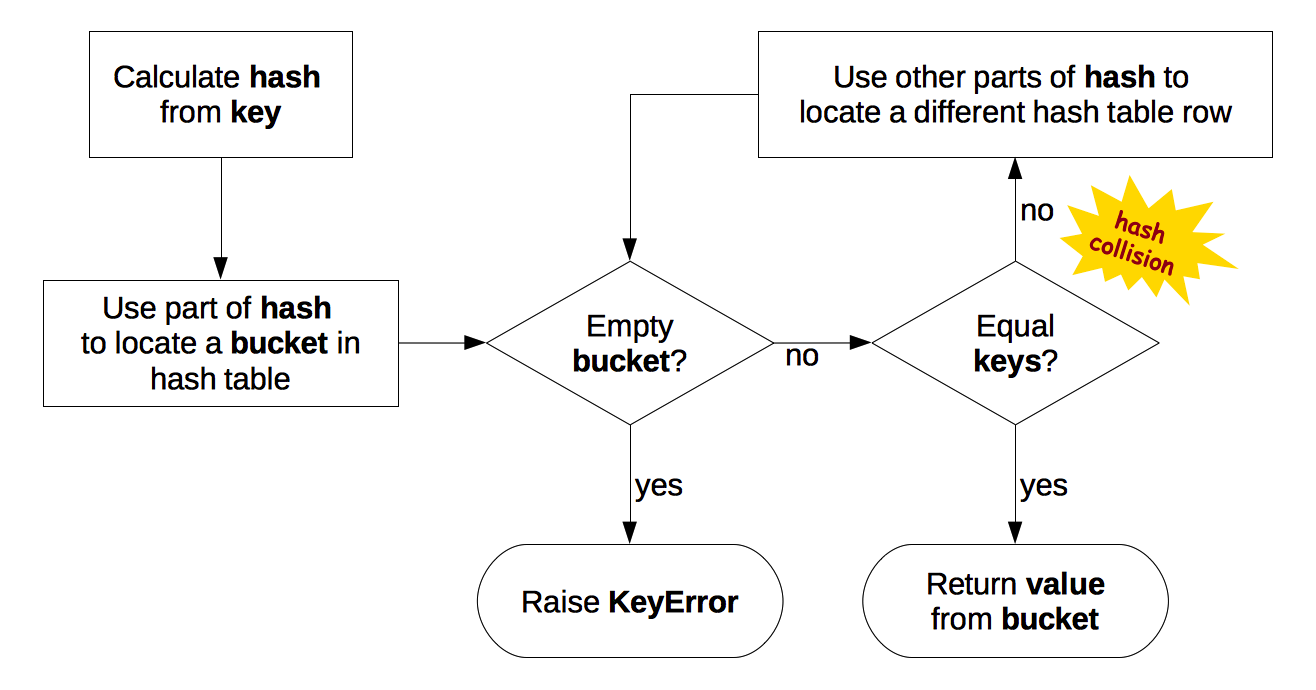
- Additionally, when inserting items Python may determine that the hash table is too crowded and rebuild it to a new location with more room.

## Practical consequences of how `dict` works
- Keys must be hashable objects
    - It supports the `hash()` function via a `__hash__()` method that always returns the same value over the lifetime of the object.
    - It supports equality via an `__eq__()` method.
    - If `a == b` is True then `hash(a) == hash(b)` must also be True.
- `dicts` have significant memory overhead
    - If you are handling a large quantity of records it makes sense to store them in a list of tuples or named tuples instead of using a list of dictionaries in JSON style, with one dict per record.
    -  If you are dealing with a few million objects and your machine has gigabytes of RAM, you should postpone such optimizations until they are actually warranted
- Key search is very fast
    - dictionaries have significant memory overhead, but they provide fast access regardless of the size of the dictionary
- Key ordering depends on insertion order
    - When a hash collision happens, the second key ends up in a position that it would not normally occupy if it had been inserted first
- Adding items to a dict may change the order of existing keys
    - Add new items -> may decide that the hash table of that dictionary needs to grow -> building a new, bigger hash table, and adding all current items to the new table -> new collisions -> keys ordered differently
    - Modifying the contents of a dict while iterating through it is a bad idea
## How `sets` work — practical consequences
- The set and frozenset types are also implemented with a hash table, except that each bucket holds only a reference to the element (as if it were a key in a dict, but without a value to go with it).